## Assignment: Box Office Winner

In this assignment, your task is to reverse engineer a provided visualization from raw data. Specifically, we will visualize the daily box office winners in 2023. The raw data comes from [BoxOfficeMojo](https://www.boxofficemojo.com/daily/2023/?view=year). The target visualization is the following.

![Box Office Winner 2023](https://github.com/qnzhou/practical_data_visualization_in_python/assets/3606672/f404debd-b1bf-4a98-933e-d3b27e3b3921)

Our temporal axis, spanning from January 1st, 2023 to December 31st, 2023, is represented along the X-axis. Meanwhile, the Y-axis delineates the daily top release for each day. We employ rounded bars to visually signify the duration of a release's dominance at the box office. Each top release is distinguished by a unique color, accompanied by its title displayed preceding the corresponding bar. These releases are organized chronologically, following the order of their initial ascent to the top position.

In [95]:
import altair as alt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime, timedelta

url = "https://github.com/qnzhou/practical_data_visualization_in_python/files/14239903/box_office_2023.csv"
df = pd.read_csv(url)

In [96]:
df.head()

,Date,Holiday,Day of Week,Top 10 Gross,Number of Releases,Top Release,Gross
0,Dec 31 2023,New Year's Eve,Sunday,23078184,40,Wonka,5208897
1,Dec 30 2023,NaN,Saturday,40050370,41,Wonka,8637841
2,Dec 29 2023,NaN,Friday,37348409,41,Wonka,8630268
3,Dec 28 2023,NaN,Thursday,33261609,43,Wonka,7988504
4,Dec 27 2023,NaN,Wednesday,33892628,42,Wonka,8135639


In [97]:
df['Date'] = pd.to_datetime(df['Date'])
df.head()

,Date,Holiday,Day of Week,Top 10 Gross,Number of Releases,Top Release,Gross
0,2023-12-31,New Year's Eve,Sunday,23078184,40,Wonka,5208897
1,2023-12-30,NaN,Saturday,40050370,41,Wonka,8637841
2,2023-12-29,NaN,Friday,37348409,41,Wonka,8630268
3,2023-12-28,NaN,Thursday,33261609,43,Wonka,7988504
4,2023-12-27,NaN,Wednesday,33892628,42,Wonka,8135639


In [98]:
# Get unique movies and assign colors
movies = df['Top Release'].unique()
colors = plt.cm.get_cmap('tab20')(np.linspace(0, 1, len(movies)))

/var/folders/96/zk8xrbrn2c92q4q77nf2c3700000gn/T/ipykernel_21282/302762475.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab20')(np.linspace(0, 1, len(movies)))


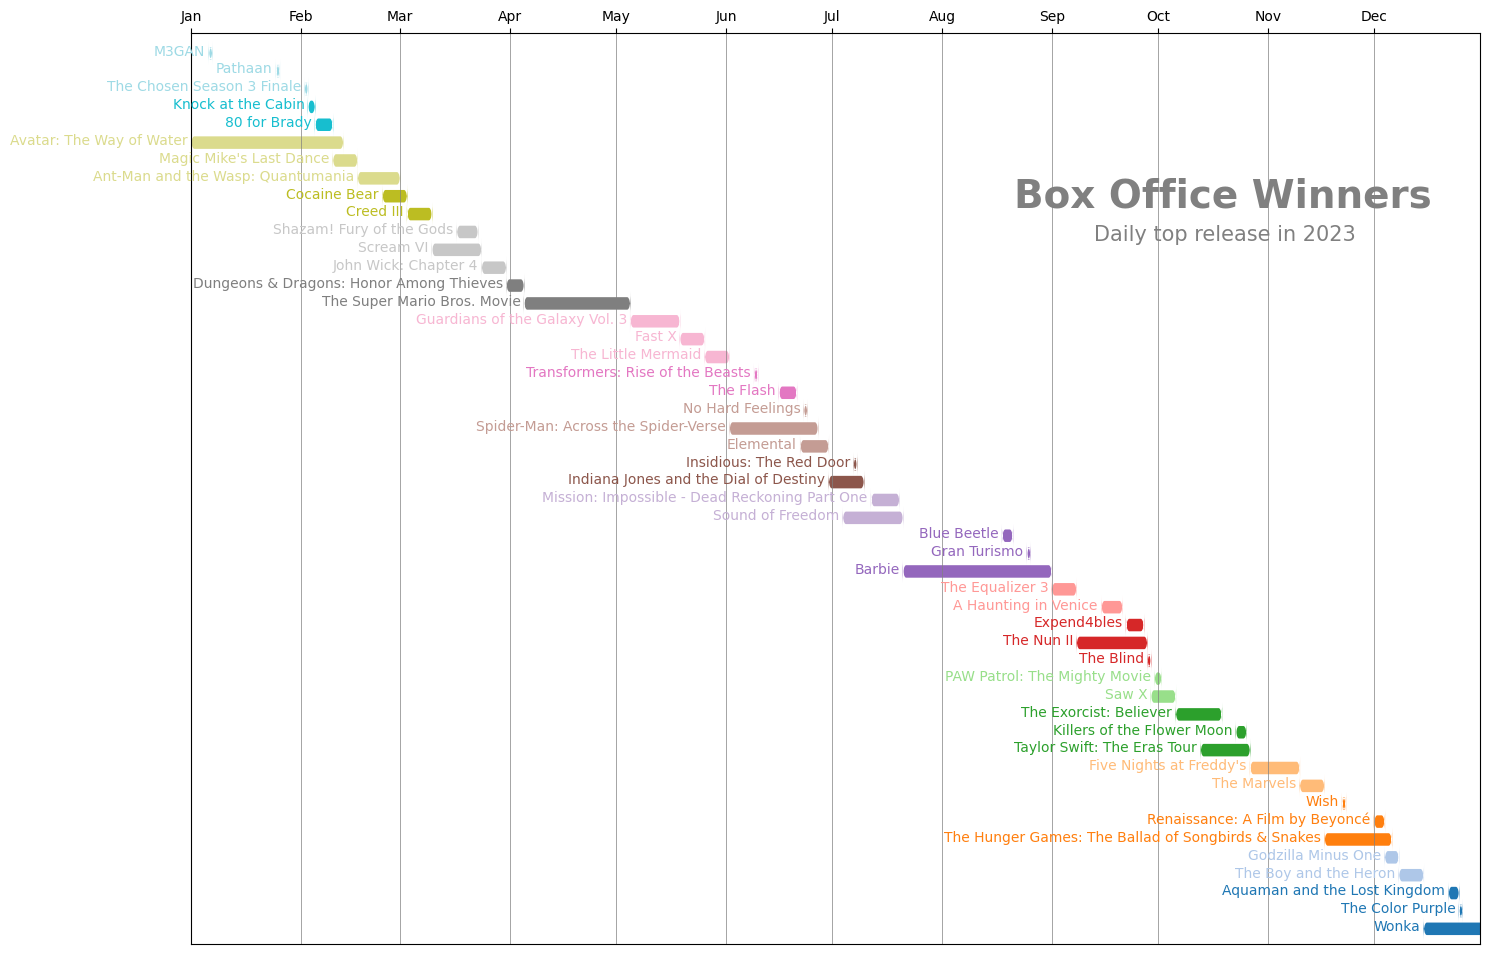

In [172]:
# Create the plot
fig, ax = plt.subplots(figsize=(15, 10))

# Plot each movie's run
for i, movie in enumerate(movies):
    movie_data = df[df['Top Release'] == movie]
    start_date = movie_data['Date'].min()
    end_date = movie_data['Date'].max()
    
    # ax.barh(i, (end_date - start_date).days + 1, left=start_date, 
    #         height=0.8, color=colors[i], alpha=1)

    left = mdates.date2num(start_date)  # Convert date to Matplotlib float
    duration = (end_date - start_date).days + 1  # Duration for the bar

    # Create a bar with rounded edges using FancyBboxPatch
    ax.add_patch(FancyBboxPatch((left, i - 0.4), duration, 0.5, 
                                boxstyle="round,pad=0.1, rounding_size=1", 
                                facecolor=colors[i], edgecolor='none', alpha=1))
    
    ax.text(start_date - timedelta(days=1), i, movie, 
            ha='right', va='center', fontsize=10, color=colors[i])

# Customize the plot
ax.set_ylim(-1, len(movies))
ax.set_xlim(datetime(2023, 1, 1), datetime(2023, 12, 31))
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))

ax.set_yticks([])
ax.xaxis.set_ticks_position('top')
ax.set_title('Box Office Winners', fontsize=28, x=0.8, y=0.8, color="grey", fontweight='bold')
plt.suptitle('Daily top release in 2023', fontsize=15, x=0.82, y=0.735, color="grey") 

ax.grid(True, axis='both', which='major', linestyle='-', linewidth=0.5, color="grey")

plt.tight_layout()
plt.show()